# **Data Exploration Projet: Vorhersage von Diabetes (old)**

### **without duplicate!!!**

Bevor das Projekt ausgeführt werden muss, muss eine virtuelle Umgebung erstellt und aktiviert werden.


1. Um eine virtuelle Umgebung zu erstellen, kann folgender Befehl in Terminal ausgeführt werden:

```bash
python3 -m venv .venv_dep
```

2. Daher wird ein neuer Ordner in dem Verzeichnis automatisch erstellt.

3. Als Nächstes muss die Umgebung mit folgendem Befehl aktiviert werden:

```bash
source .venv_dep/bin/activate
```

oder in VSCode muss man manuell die Kernel auf oben rechte Seite festlegen.

4. Jetzt ist alles vorbereitet.

In [2]:
# Install Dependencies

%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install mlflow
%pip install seaborn
%pip install mlxtend
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt


%matplotlib inline

# **Auswahl Datensatz**

In [4]:
#Import Dataset
dataset = "https://raw.githubusercontent.com/rakaputra12/Data_Exploration_Diabetes/main/Healthcare-Diabetes.csv"
diabetes_df = pd.read_csv(dataset)

Der Datensatz ist in dem GitHub-Repository abgelegt, was bedeutet, dass er von überall aus einfach zugänglich ist. Dazu wird auch der Datensatz in dem Ordner dazu gegeben, aber muss die Pfad angepasst werden.

In [5]:
diabetes_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#Delete the column "Id"
diabetes_df = diabetes_df.drop('Id', axis=1)

# **Charakterisierung des Datensatzes**

In [7]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [9]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [10]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [11]:
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2763,False,False,False,False,False,False,False,False,False
2764,False,False,False,False,False,False,False,False,False
2765,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False


In [12]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Im Rohdatensatz, bevor eine Bereinigung durchgeführt wird, ist es nicht ungewöhnlich, fehlende Werte zu finden.Daher ist es in dem Fall wichtig, eine gründliche Untersuchung der fehlenden Werte durchzuführen, um ihr Ausmaß und ihre Verteilung zu verstehen. 

In [13]:
zero_counts = (diabetes_df == 0).sum()
zero_counts

Pregnancies                  412
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1816
dtype: int64

After further checking, it was found that in certain columns, the zero values did not make sense, indicating missing values.

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI. There are many approachs to handling missing values in a dataset. Replacing zero values with NaN and then filling them with the distribution for each column is one of many common possibilities.

Replacing zero values with NaN and then filling them with the distribution for each column is a reasonable approach to handling missing data in this case, cause Reducing the potential bias introduced by using a single imputation method for all missing values leads to more accurate and robust analyses, particularly in datasets where different columns have distinct distributions.This technique allows you to preserve the integrity of the data and capture the uncertainty associated with missing values. On the column like Pregnancies, a value of zero does make sense, cause someone can have never been pregnant. For the column "Outcome" is because the value for sufferer or not is only differentiated by one or zero.

Bei einer weiteren Überprüfung wurde festgestellt, dass in bestimmten Spalten die Nullwerte keinen Sinn ergaben, was auf fehlende Werte hindeutet.
Die folgenden Spalten oder Variablen haben einen ungültigen Nullwert: Glukose, Blutdruck, Hautdicke, Insulin, BMI. Es gibt viele Ansätze für die Behandlung fehlender Werte in einem Datensatz. Das Ersetzen von Nullwerten durch NaN und das anschließende Auffüllen mit der Verteilung für jede Spalte ist eine von vielen gängigen Möglichkeiten.
Das Ersetzen von Nullwerten durch NaN und das anschließende Auffüllen mit der Verteilung für jede Spalte ist in diesem Fall ein vernünftiger Ansatz für den Umgang mit fehlenden Daten, denn die Verringerung der potenziellen Verzerrung durch die Verwendung einer einzigen Imputationsmethode für alle fehlenden Werte führt zu genaueren und robusteren Analysen, insbesondere in Datensätzen, in denen verschiedene Spalten unterschiedliche Verteilungen aufweisen. In der Spalte "Schwangerschaften" macht ein Wert von Null durchaus Sinn, da jemand nie schwanger gewesen sein kann. Bei der Spalte "Ergebnis" wird der Wert für "erkrankt" oder "nicht erkrankt" nur durch eins oder null unterschieden.

In [14]:
#Replace zeros with NaN Value
filtered_diabetes_df = diabetes_df.copy(deep = True)
filtered_diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = filtered_diabetes_df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

#Showing the Count of NaNs
print(filtered_diabetes_df.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [15]:
#Aiming to impute NaN values for the columns in accordance with their distribution
filtered_diabetes_df['Glucose'].fillna(filtered_diabetes_df['Glucose'].mean(), inplace=True)
filtered_diabetes_df['BloodPressure'].fillna(filtered_diabetes_df['BloodPressure'].mean(), inplace=True)
filtered_diabetes_df['SkinThickness'].fillna(filtered_diabetes_df['SkinThickness'].mean(), inplace=True)
filtered_diabetes_df['Insulin'].fillna(filtered_diabetes_df['Insulin'].mean(), inplace=True)
filtered_diabetes_df['BMI'].fillna(filtered_diabetes_df['BMI'].mean(), inplace=True)

/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_34251/2787525002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_diabetes_df['Glucose'].fillna(filtered_diabetes_df['Glucose'].mean(), inplace=True)
/var/folders/4l/lbf6f7cx7pd9qfs2p1px1_x00000gn/T/ipykernel_34251/2787525002.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

Um die Qualität des Datensatzes zu verbessern und Overfitting zu vermeiden, wird auch eine Duplikationsprüfung des Datensatzes durchgeführt.

In [16]:
# Check for and count the number of duplicate rows in the DataFrame
filtered_diabetes_df.duplicated().sum()

1990

Nach der Überprüfung wurde herausgefunden, dass 1030 Duplikationzeile vorhanden sind. Daher werden sie gelöscht.

In [17]:
# Remove duplicate rows from the DataFrame to ensure data integrity and avoid duplication issues
filtered_diabetes_df = filtered_diabetes_df.drop_duplicates()
filtered_diabetes_df.duplicated().sum()

0

Nun ist der Datensatz bereit zu verarbeiten.

## **Perform EDA (Exploratory Data Analysis )**

Outcome
0    506
1    272
Name: count, dtype: int64


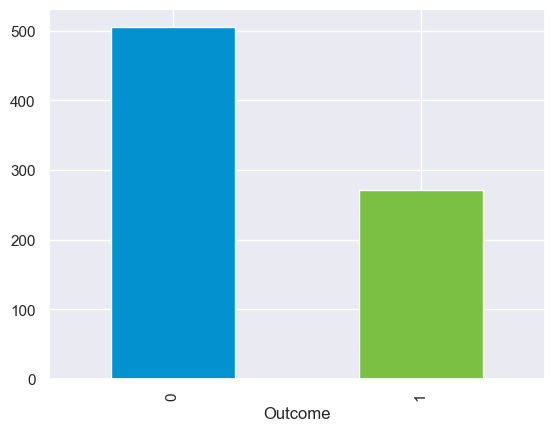

In [18]:
#Checking the balance of the data by plotting the count of outcomes by their values
colors = ['#0392cf', '#7bc043']

print(filtered_diabetes_df.Outcome.value_counts())
p = filtered_diabetes_df.Outcome.value_counts().plot(kind="bar", color = colors)

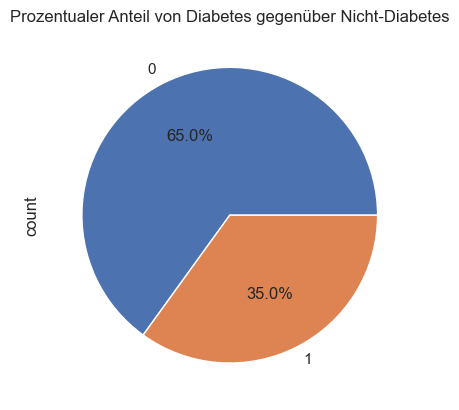

In [19]:
# Plotting a pie chart to visualize the percentage distribution of diabetes and non-diabetes outcomes
filtered_diabetes_df['Outcome'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Prozentualer Anteil von Diabetes gegenüber Nicht-Diabetes')
plt.show()

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients.

Das obige Diagramm zeigt, dass die Daten leicht in Richtung der Datenpunkte mit einem Rückgabewert von 0 verzerrt sind. Die Zahl der Nicht-Diabetiker ist fast doppelt so hoch wie die Zahl der Diabetiker.

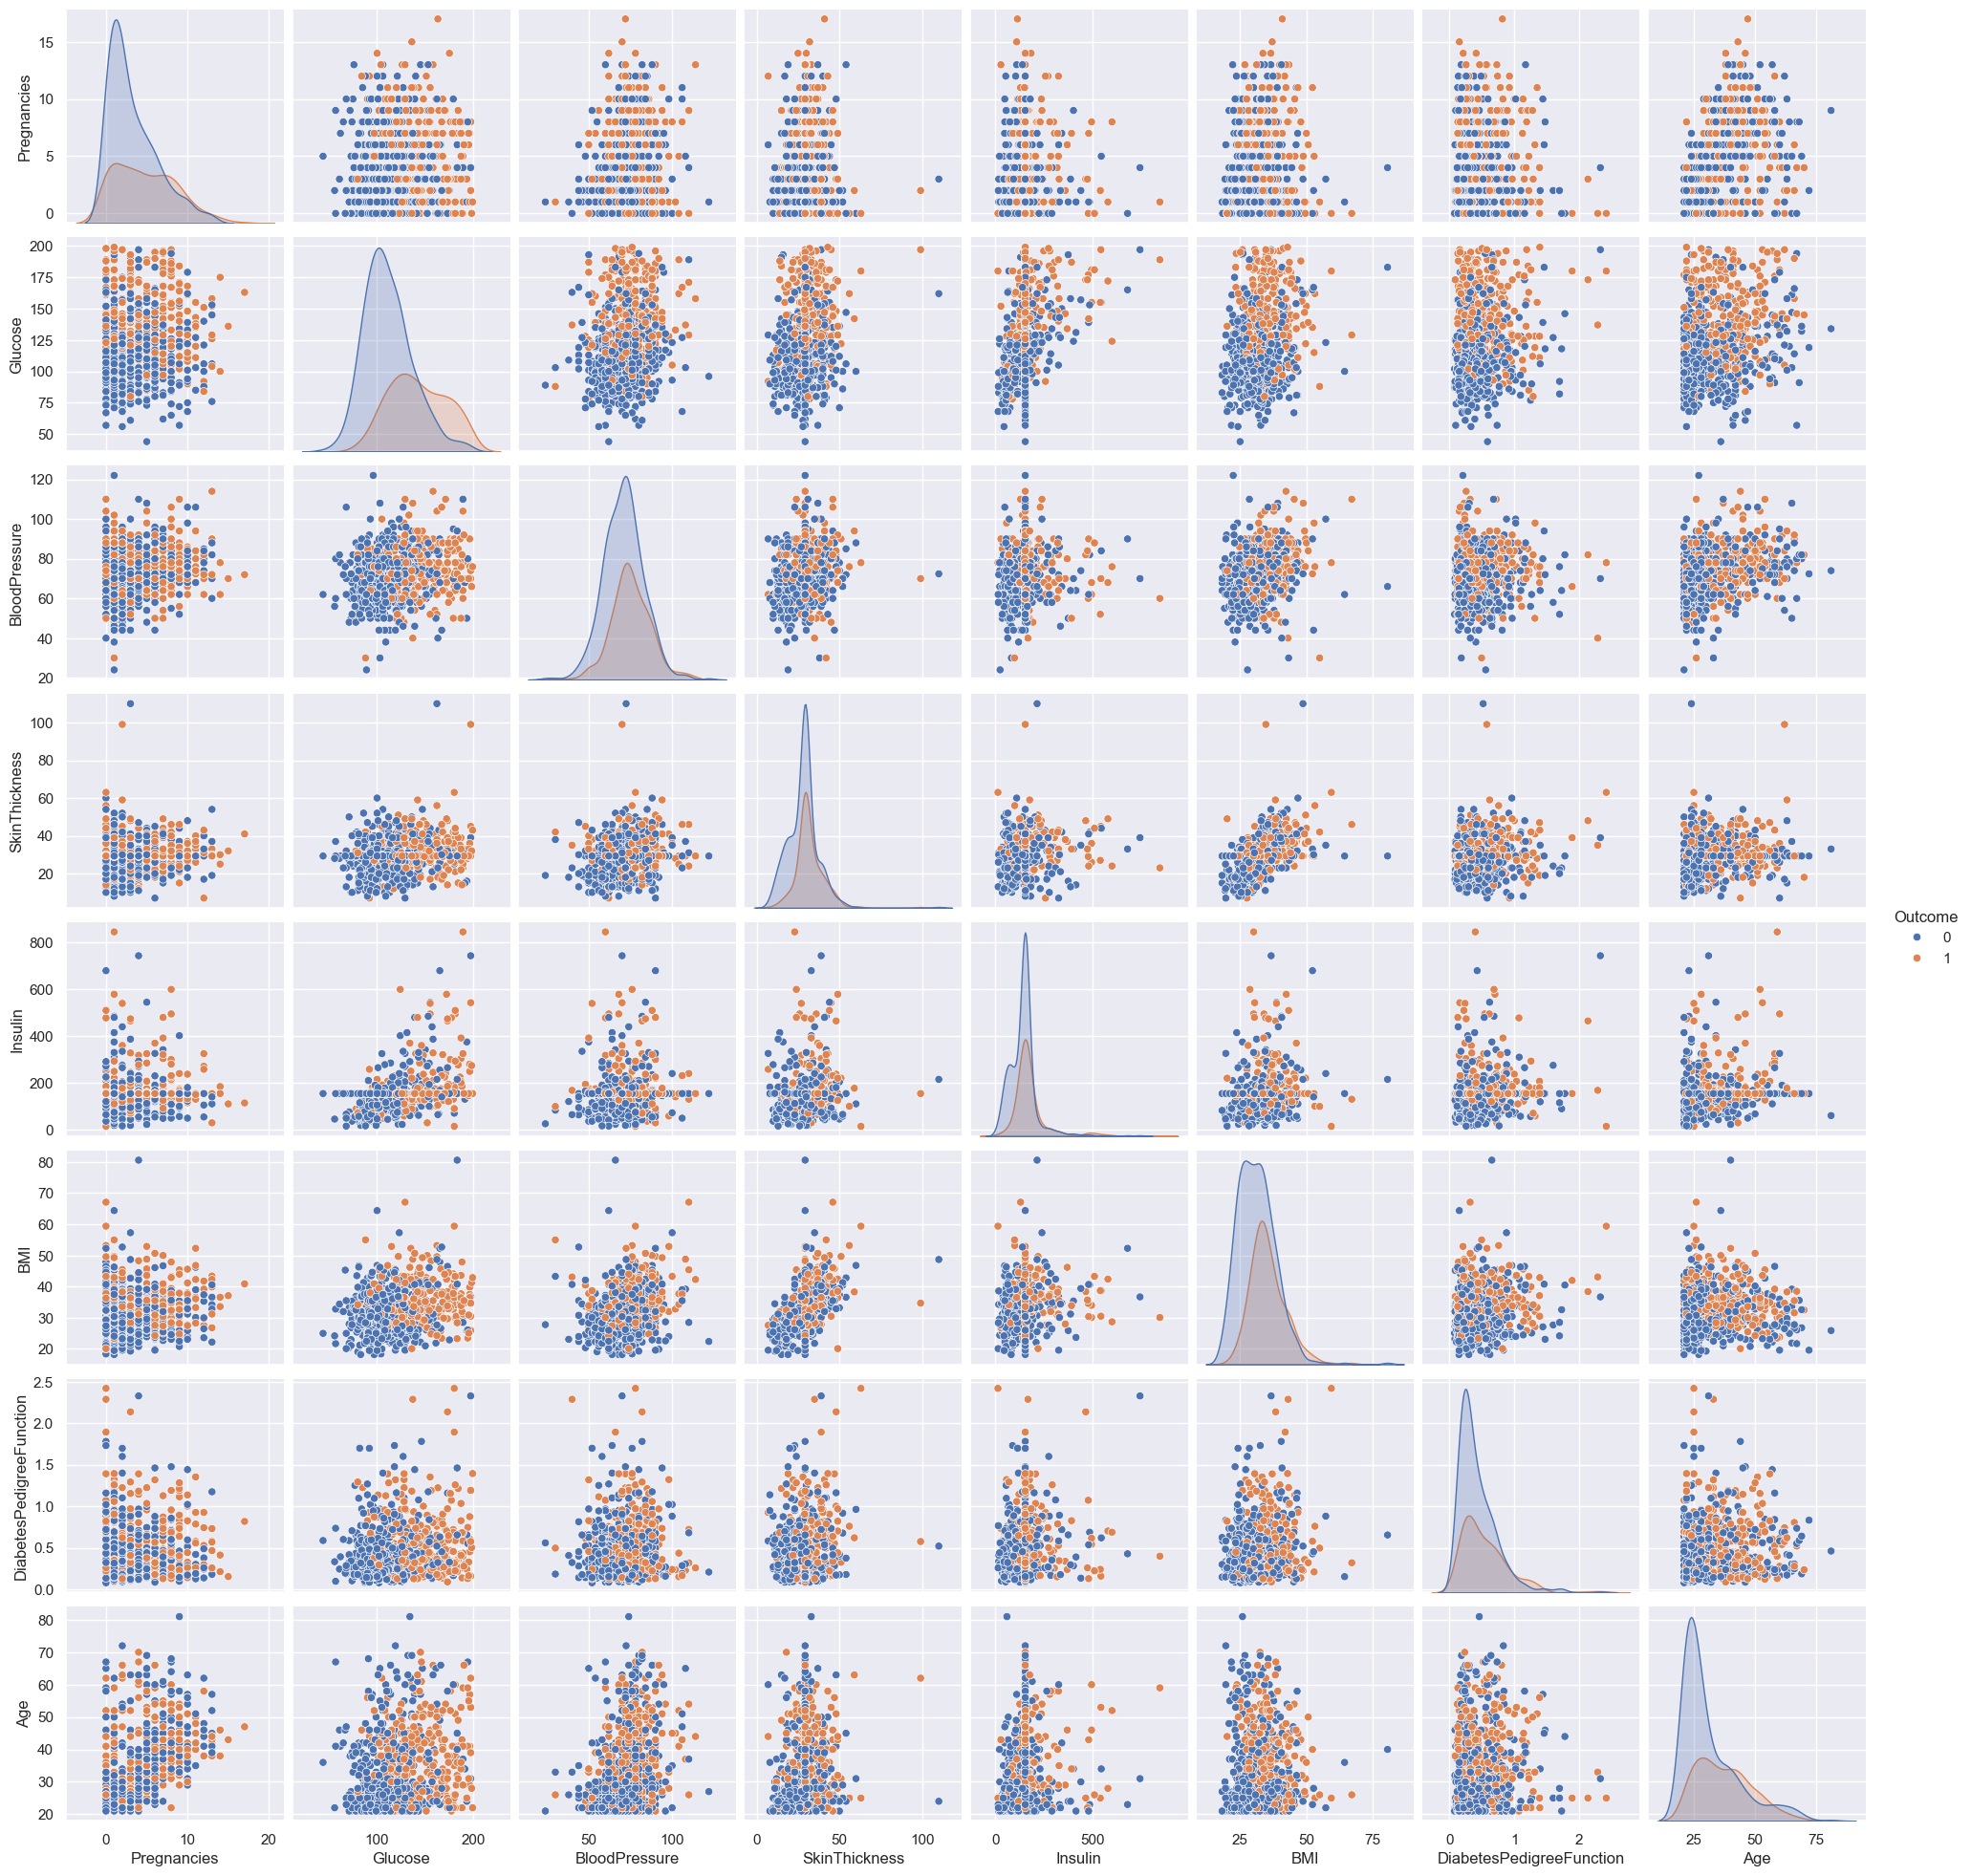

In [20]:
#Plotting the Pair Plots for the cleaned data
p = sns.pairplot(filtered_diabetes_df, hue= 'Outcome')

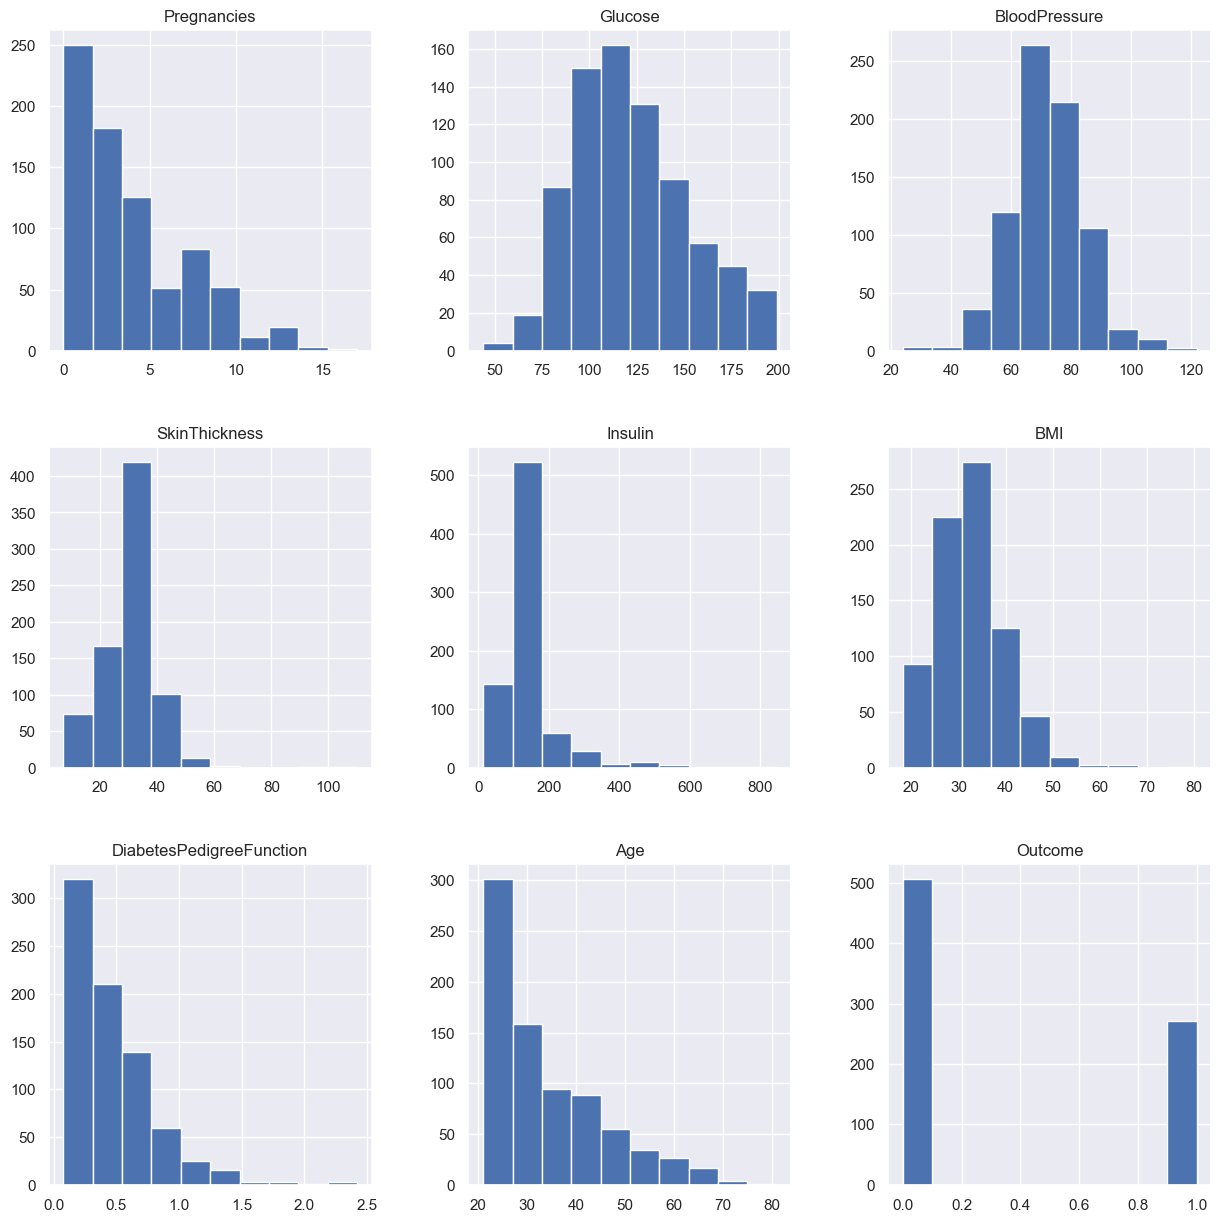

In [21]:
#Plotting the distribution after replacing the NaN Values
p = filtered_diabetes_df.hist(figsize=(15,15))

## **Correlation between all the features**

In [22]:
# Calculate the correlation matrix 
filtered_diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123141,0.212576,0.070145,0.053387,0.013976,-0.034159,0.532993,0.220380
Glucose,0.123141,1.000000,0.206318,0.198460,0.417571,0.241074,0.137056,0.265352,0.484826
BloodPressure,0.212576,0.206318,1.000000,0.188769,0.074083,0.243746,0.000829,0.323730,0.173105
SkinThickness,0.070145,0.198460,0.188769,1.000000,0.161084,0.505634,0.099888,0.128743,0.204290
Insulin,0.053387,0.417571,0.074083,0.161084,1.000000,0.162633,0.102685,0.136742,0.212978
BMI,0.013976,0.241074,0.243746,0.505634,0.162633,1.000000,0.140230,0.033262,0.277486
DiabetesPedigreeFunction,-0.034159,0.137056,0.000829,0.099888,0.102685,0.140230,1.000000,0.034839,0.172160
Age,0.532993,0.265352,0.323730,0.128743,0.136742,0.033262,0.034839,1.000000,0.244260
Outcome,0.220380,0.484826,0.173105,0.204290,0.212978,0.277486,0.172160,0.244260,1.000000


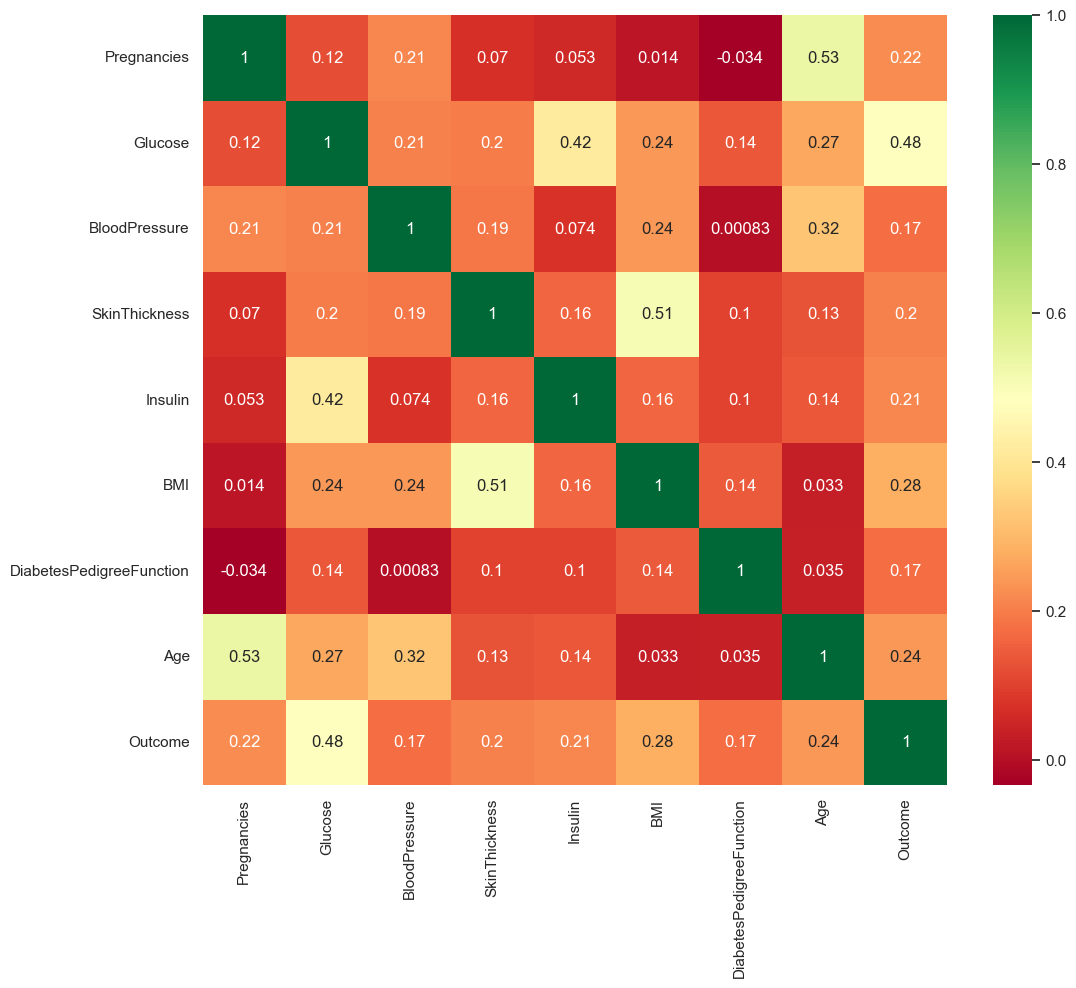

In [23]:
#Correlation between all the features after cleaning
plt.figure(figsize= (12,10))
p = sns.heatmap(filtered_diabetes_df.corr(), annot = True, cmap = 'RdYlGn')

# **Feature Engineering**

In [24]:
#Import Libraries for Feature Enginnering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [25]:
# Extracting features (X) and target variable (y) from the DataFrames
X=filtered_diabetes_df[filtered_diabetes_df.columns[0:-1]]
y=filtered_diabetes_df[filtered_diabetes_df.columns[-1]]

### **Split the dataset for Feature Importance**

In [26]:
# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

## **Ermittlung der Feature Importance mit einem Decision Tree**

In [27]:
# Instantiate a DecisionTreeClassifier with specified parameters
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

# Train the Decision Tree classifier on the training data
tree.fit(X_train,y_train)

# Print the accuracy on the test set and the training set
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.718


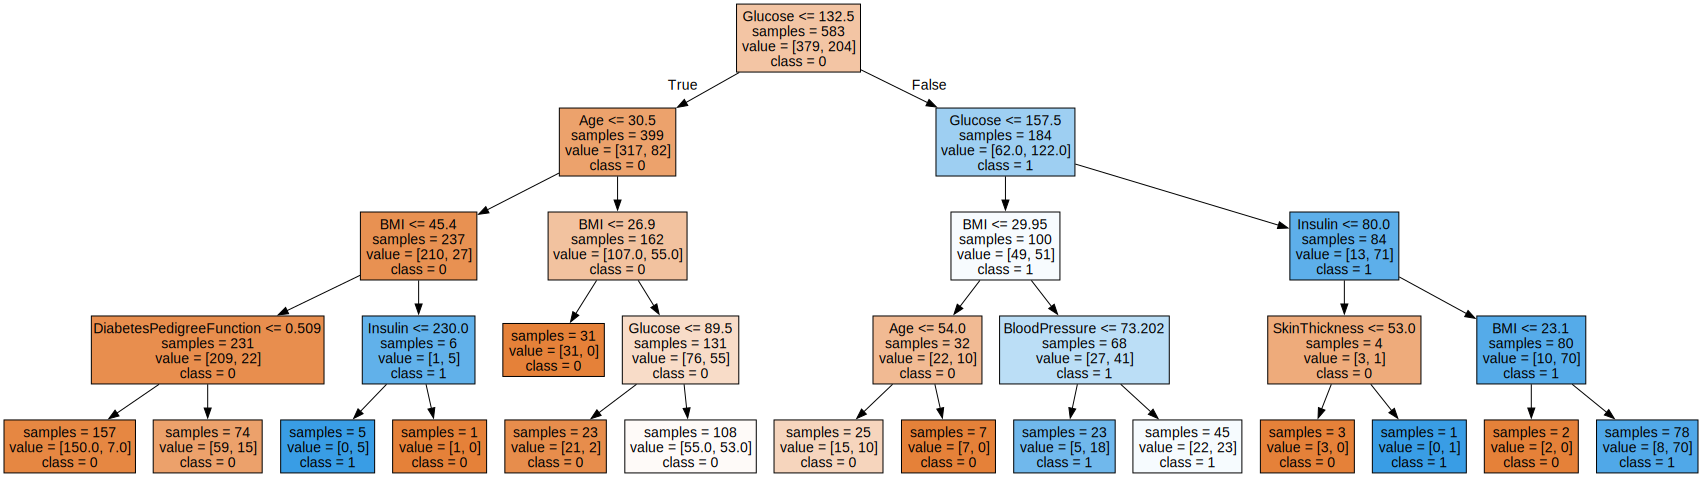

In [28]:
from sklearn.tree import export_graphviz

# Export the decision tree visualization to a .dot file
export_graphviz(tree,
                out_file="diabetes_tree.dot",
                class_names=["0","1"],
                feature_names=X.columns,
                impurity=False,
                filled=True)

import graphviz

# Read the .dot file and visualize the decision tree
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [29]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.60868234 0.0197465  0.01320043 0.04085847 0.19379673
 0.02213104 0.10158449]


In [30]:
# Create a DataFrame to display feature importances
df_feature_importance = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': tree.feature_importances_ })
df_feature_importance

,Feature Names,Importance of Feature
0,Pregnancies,0.000000
1,Glucose,0.608682
2,BloodPressure,0.019747
3,SkinThickness,0.013200
4,Insulin,0.040858
5,BMI,0.193797
6,DiabetesPedigreeFunction,0.022131
7,Age,0.101584


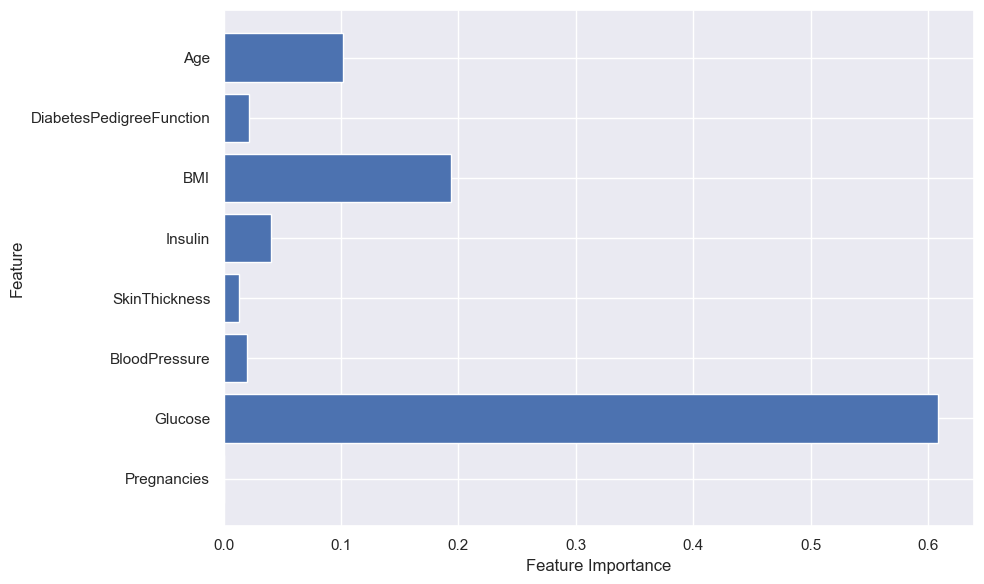

In [31]:
# Plot feature importances using the provided decision tree model
def plot_feature_importances_with_DecisionTree(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig("feature_importance_with_DecisionTree.png", dpi=300)
    plt.show()
    plt.close()
plot_feature_importances_with_DecisionTree(tree)

Hier kann man erkennen, dass Feature "Glucose", "Age" and "BMI" Parameter sind, auf die geachtet werden müssen.

## **Ermittlung der Feature Importance mit einem Random  (Als Vergleich)**

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define feature names
feature_names = [f"feature {i}" for i in range(X.shape[1])]

# Instantiate a RandomForestClassifier with specified parameters
forest = RandomForestClassifier(n_estimators=100,random_state=0)

# Train the Random Forest classifier on the training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
print(forest.feature_importances_)

[0.08003634 0.26080317 0.08373953 0.08111922 0.08408324 0.15988817
 0.1278077  0.12252262]


In [34]:
# Create a DataFrame to display feature importances
df_feature_importance_withRandomForest = pd.DataFrame({'Feature Names': X.columns, 'Importance of  Feature': forest.feature_importances_ })
df_feature_importance_withRandomForest

,Feature Names,Importance of Feature
0,Pregnancies,0.080036
1,Glucose,0.260803
2,BloodPressure,0.083740
3,SkinThickness,0.081119
4,Insulin,0.084083
5,BMI,0.159888
6,DiabetesPedigreeFunction,0.127808
7,Age,0.122523


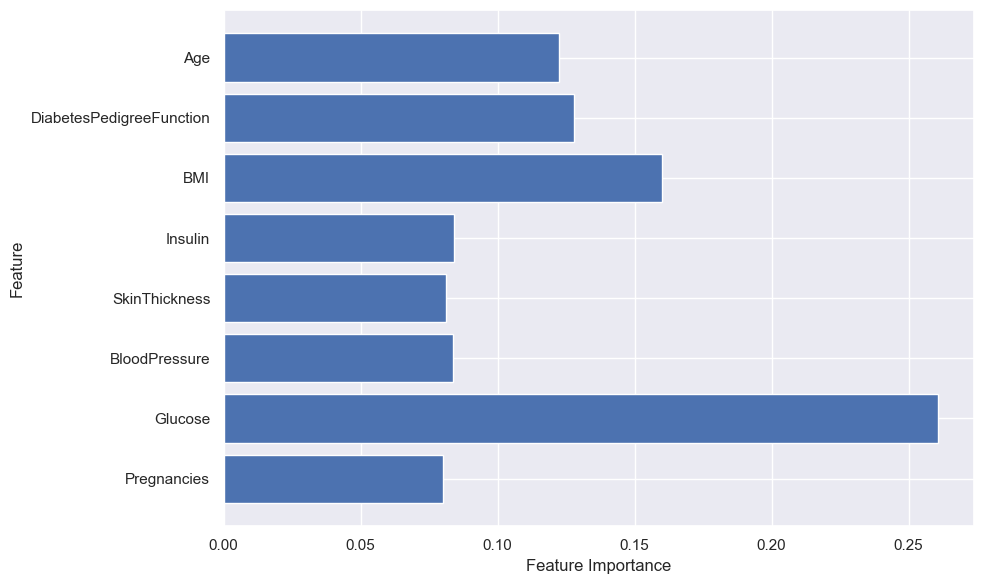

In [35]:
def plot_feature_importances_with_RandomForest(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.savefig("feature_imporatnace_with_RandomForest.png", dpi=300)
    plt.show()
    plt.close()
plot_feature_importances_with_RandomForest(forest)

Nach einem Vergleich mit dem RandomForest-Algorithmus wurde bestätigt, dass die Merkmale "Glucose", "Age" und "BMI" als die wichtigsten Merkmale identifiziert wurden. Dies deutet darauf hin, dass diese spezifischen Merkmale einen signifikanten Einfluss auf das Modell haben und einen wesentlichen Beitrag zur Vorhersageleistung leisten. 

# **Auswahl der Metriken**

Für den Datensatz "Diabetes" wurde dazu entschieden, den F1-Score als Evaluationsmetrik zu verwenden. Der F1-Score ist eine Metrik, die das Gleichgewicht zwischen Präzision und Rückruf (Recall) misst. Es ist besonders nützlich, wenn die Klassen im Datensatz nicht gleichmäßig verteilt sind oder wenn False Positives und False Negatives ähnlich schwerwiegend sind. Im Falle des Diabetes-Datensatzes, bei dem es um die korrekte Vorhersage von Diabetesfällen geht, kann der F1-Score hilfreich sein, um sicherzustellen, dass sowohl die Präzision als auch der Rückruf bei der Vorhersage von positiven Fällen berücksichtigt werden.

Es gibt verschiedene Überlegungen und Prioritäten für jede Metrik.

- Wenn falsch-positive Vorhersagen kostspielig sind: Wählen Sie Präzision. Die Präzision misst den Anteil der richtig positiven Vorhersagen an allen positiven Vorhersagen. Wenn falsch positive Vorhersagen in Ihrem Szenario kostspielig sind (z. B. unnötige Behandlungen oder Eingriffe bei Personen, die nicht an Diabetes leiden), sollten Sie der Präzision den Vorrang geben.

- Wenn falsch-negative Vorhersagen kostspielig sind: Wählen Sie Recall. Recall misst den Anteil wahrer positiver Vorhersagen an allen tatsächlich positiven Instanzen. Wenn das Auslassen positiver Fälle (falsch-negative Vorhersagen) in Ihrem Kontext kritischer ist (z. B. wenn Personen, die tatsächlich Diabetes haben, nicht diagnostiziert werden), sollten Sie der Rückrufquote den Vorzug geben.

- Wenn Sie ein Gleichgewicht brauchen: Wählen Sie den F1-Score. Der F1-Score ist der harmonische Mittelwert aus Präzision und Recall und bietet ein ausgewogenes Maß für beide. Er ist nützlich, wenn Sie den Kompromiss zwischen falsch-positiven und falsch-negativen Ergebnissen abwägen möchten.

# **Auswahl und Beschreibung der ML-Methode**

Dazu kommt die Methode "Supervised Learning" zum Einsatz. Dafür wurde auch der Support Vector Machine (SVM) Algorithmus in Betracht gezogen. 

Die Support Vector Machine ist ein leistungsstarker Algorithmus für die Klassifizierung und Regression, der besonders effektiv in der Verarbeitung komplexer Daten und in Szenarien mit hoher Dimensionalität ist. Dies macht sie zu einer attraktiven Wahl für den Diabetes-Datensatz, der oft Merkmale mit hoher Dimensionalität aufweist und möglicherweise nicht-linear trennbar ist.

Ein weiterer Vorteil der SVM ist ihre Fähigkeit, gut mit kleineren Trainingsdatensätzen umzugehen, ohne an Leistung zu verlieren. Dies ist besonders relevant in Situationen, in denen der Diabetes-Datensatz begrenzte Datenpunkte aufweisen könnte.

Darüber hinaus bietet die SVM die Möglichkeit, verschiedene Kernel-Funktionen zu verwenden, um die Entscheidungsgrenze zwischen den Klassen anzupassen. Dies ermöglicht es, auch in komplexen, nicht-linearen Datenstrukturen effektive Trennungen zu finden.

## **Preparation Data**

Bevor das Modell mit Diabetes Datensatz trainiert wird, muss der Datensatz noch ein bisschen vorbereitet werden. Datenpräparation hilft dabei, sicherzustellen, dass die Eingabedaten in der Produktionsumgebung, in der das Modell eingesetzt wird, in der richtigen Form vorliegen und dass das Modell effizient und effektiv arbeiten kann.

Es ist auch wichtig zu merken, dass in dem Fall  alle Features für die Training genommen werden, weil zwei Features sehr zu wenig für die Modelling sind.

In [36]:
# Separating features (X) and target variable (y) from the DataFrame
X = filtered_diabetes_df.drop("Outcome", axis=1)
y = filtered_diabetes_df['Outcome']

Hier geht es um die Verteilung von Daten

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


x_normalized = StandardScaler().fit_transform(X)
df_x_normalized = pd.DataFrame(x_normalized, columns=X.columns)

x_pca  = PCA(n_components=2).fit_transform(df_x_normalized.values)
df_x_pca = pd.DataFrame(x_pca, columns=range(2))

df_pca = pd.concat([df_x_pca, y], axis=1)

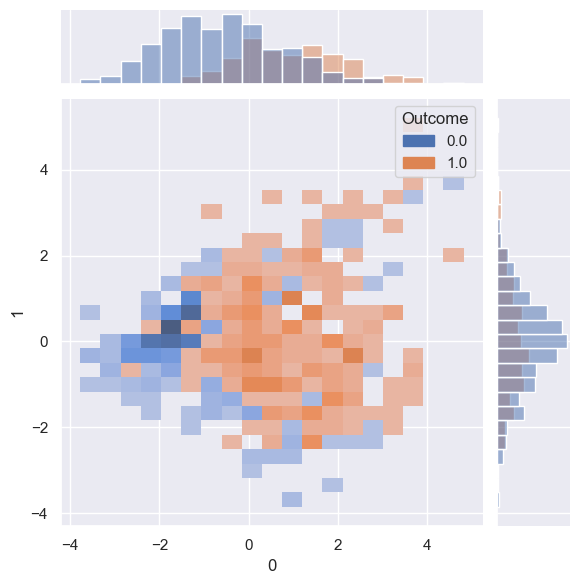

In [38]:
ax_jointplot = sns.jointplot(data=df_pca, x=0, y=1, hue="Outcome", kind="hist")

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Transform the features using StandardScaler and create a DataFrame with scaled features
X = pd.DataFrame(scaler.fit_transform(X), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.648675,0.854485,-0.026804,0.603792,-0.010522,0.131548,0.470164,1.413490
1,-0.840025,-1.214614,-0.520283,-0.041370,-0.010522,-0.834045,-0.366282,-0.199215
2,1.244156,2.003984,-0.684776,-0.010226,-0.010522,-1.289253,0.606541,-0.114336
3,-0.840025,-1.083243,-0.520283,-0.686532,-0.722444,-0.627132,-0.923912,-1.048008
4,-1.137765,0.493213,-2.658694,0.603792,0.152127,1.441995,5.503991,-0.029457


## **Split Dataset**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Nach viele Proben führt die Einstellung der Splitgröße 
- auf 0,2 zu einer gleichen Punktzahl
- auf 0.3 zu einer geringen Punktzahl

Siehe Bereich Evaluation und Ergebnisdarstellung!!! unten

# **Implementierung Training**

In [44]:
from sklearn.metrics import classification_report, accuracy_score

In [45]:
from sklearn import svm

# Instantiate SVM classifier
machine = svm.SVC()

# Train the SVM classifier on the training data
machine.fit(X_train,y_train)

# Predict using the trained SVM classifier
y_pred = machine.predict(X_test)

# Calculate accuracy
clf_acc = accuracy_score(y_pred, y_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy of SVM classifier
print("Accuracy SVM: {:.2f}%".format(clf_acc * 100))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.62      0.63      0.62        46

    accuracy                           0.78       156
   macro avg       0.73      0.73      0.73       156
weighted avg       0.78      0.78      0.78       156

Accuracy SVM: 77.56%


# **Hyperparametertuning Verwendung ML Lifecycle Mgt im Code**

Hyperparameter-Tuning ist ein entscheidender Schritt im maschinellen Lernprozess, der darauf abzielt, die Leistung eines Modells weiter zu verbessern, indem die optimalen Werte für die Hyperparameter gefunden werden. Selbst wenn ein Modell bereits eine akzeptable Leistung erzielt hat, wie in dem Fall mit einer Punktzahl von 73,75% von der ersten Implementierung, kann das Tuning der Hyperparameter dazu beitragen, die Leistung weiter zu steigern. 

In dem Fall kommt auch dazu ein ML Lifecylce Management "MlFlow" zum Einsatz. Ein ML Lifecycle Management wird verwendet, um Parameter, Metriken und Ausgabedateien zu protokollieren, wenn der maschinellen Lerncode sausgeführt wird, und um die Ergebnisse später zu visualisieren. 


In [ ]:
#Install Dependencies
%pip install mlflow

In [88]:
import mlflow
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [ ]:
# Launch the MLflow UI
!mlflow ui

[2024-04-13 13:19:28 +0200] [33670] [INFO] Starting gunicorn 21.2.0
[2024-04-13 13:19:28 +0200] [33670] [INFO] Listening at: http://127.0.0.1:5000 (33670)
[2024-04-13 13:19:28 +0200] [33670] [INFO] Using worker: sync
[2024-04-13 13:19:28 +0200] [33671] [INFO] Booting worker with pid: 33671
[2024-04-13 13:19:28 +0200] [33672] [INFO] Booting worker with pid: 33672
[2024-04-13 13:19:28 +0200] [33673] [INFO] Booting worker with pid: 33673
[2024-04-13 13:19:29 +0200] [33674] [INFO] Booting worker with pid: 33674
^C
[2024-04-13 13:20:09 +0200] [33670] [INFO] Handling signal: int
[2024-04-13 13:20:09 +0200] [33672] [INFO] Worker exiting (pid: 33672)
[2024-04-13 13:20:09 +0200] [33673] [INFO] Worker exiting (pid: 33673)
[2024-04-13 13:20:09 +0200] [33674] [INFO] Worker exiting (pid: 33674)
[2024-04-13 13:20:09 +0200] [33671] [INFO] Worker exiting (pid: 33671)


Um den nächsten Code auszuführen, muss MLFlow ui zuerst durch manuelles Drücken der Stopp-Taste gestoppt werden.

In [86]:
if mlflow.active_run():
    mlflow.end_run()
    
# Start an MLflow run
mlflow.start_run(nested=True)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Regularization parameter
    'kernel': ['linear', 'rbf','poly', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'coef0': [0.0, 0.1, 0.5],  # Independent term in kernel function
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
    'probability': [True, False],  # Whether to enable probability estimates
    'tol': [0.0001, 0.001, 0.01],  # Tolerance for stopping criterion
}


# Create GridSearchCV
grid_search = GridSearchCV(estimator=machine, param_grid=param_grid, n_jobs=6, cv=5, scoring='accuracy', refit='accuracy', return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Extract the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]

# Log the parameters that are constant across all runs
mlflow.log_params(param_grid)

# Loop through each experiment result and save the results to a nested experiment within the experiment
for _, row in results.iterrows():
    mlflow.log_metrics({
        'mean_test_score': row['mean_test_score'],
        'std_test_score': row['std_test_score'],
        'mean_train_score': row['mean_train_score'],
        'std_train_score': row['std_train_score']
    })

# Log parameters and metrics to MLflow
mlflow.log_metric("best_score", grid_search.best_score_)
# Log the best parameters as a parameter
for key, value in grid_search.best_params_.items():
    mlflow.log_param(f"best_{key}", value)


# Log the trained model
mlflow.sklearn.log_model(grid_search.best_estimator_, "svm_model")

 # End the  MLflow run
mlflow.end_run()

# **Evaluation und Ergebnisdarstellung** | **Predict and Evaluate**

In [61]:
# Use the best estimator to predict
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the model
clf_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Accuracy SVM after GridSearchCV: {:.2f}%".format(clf_acc*100))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       158
           1       0.61      0.66      0.63        76

    accuracy                           0.75       234
   macro avg       0.72      0.73      0.72       234
weighted avg       0.76      0.75      0.75       234

Accuracy SVM after GridSearchCV: 75.21%


<Axes: >

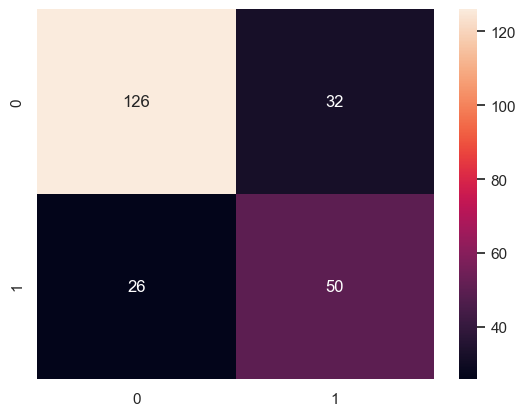

In [76]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

WENN SPLITTING 0.2

Nachdem das Hyperparameter-Tuning durchgeführt wurde, bleibet die Punktzahl des Modells von 77,56%. Die anhaltende Punktzahl von 77,56% nach dem Hyperparameter-Tuning deutet darauf hin, dass das Modell eine gewisse Stabilität erreicht hat und bereits eine gute Leistung zeigt. Trotzdem besteht möglicherweise noch Raum für Verbesserungen, insbesondere durch weitere Feinabstimmung der Hyperparameter oder durch die Untersuchung anderer Modellarchitekturen. 

WENN SPLITTING 0.3

Nachdem das Hyperparameter-Tuning durchgeführt wurde, sinkt die Punktzahl des Modells von 76,50% auf 75,21%. Dies bedeutet, dass die Leistung des Modells nach der Optimierung der Hyperparameter etwas abgenommen hat.Ein Rückgang der Punktzahl nach dem Hyperparameter-Tuning kann verschiedene Gründe haben:

- Überanpassung (Overfitting): Es besteht die Möglichkeit, dass das Modell nach dem Tuning der Hyperparameter zu stark auf die Trainingsdaten passt und daher eine geringere Leistung auf neuen, unbekannten Daten zeigt
- Suboptimale Hyperparameter-Kombination: Obwohl das Tuning darauf abzielt, die besten Hyperparameter-Kombinationen zu finden, besteht die Möglichkeit, dass die gewählten Hyperparameter nicht optimal sind und die Leistung des Modells beeinträchtigen.

Es ist wichtig zu beachten, dass ein leichter Rückgang der Punktzahl nicht unbedingt bedeutet, dass das Modell insgesamt schlechter geworden ist. Es könnte immer noch besser auf unbekannten Daten generalisieren oder möglicherweise stabiler sein. 

NEHME ICH DIESEN SATZ???
_Es ist ratsam, verschiedene Metriken zu betrachten und das Modell sorgfältig zu evaluieren, um eine fundierte Entscheidung über seine Leistung zu treffen._

## **Plot**

Wenn das SVM-Modell für 8 Features trainiert wurde und die Entscheidungsgrenzen direkt in einem 8-dimensionalen Raum geplottet werden, ist dies leider nicht möglich, da die visuelle Vorstellungskraft auf drei Dimensionen begrenzt ist.

Durch die Anwendung von PCA beispielweise kann die Anzahl die der Features auf zwei oder drei reduziert werden, aber das SVM-Modell bereits mit 8 Features trainiert wurde. es ist quasi sinnlos, obwohl die Reduzierung vorgenommen würde.

In dem Fall sind 8 Features tatsächlich zu wenig für Training laut Best Practices, sogar 2 Features. Daher besteht hier eine gewisse Verwirrung

# **Vorhersage-Demo | Testing**

Die Vorhersage-Demo mit dem Modell, das optimale Hyperparameter verwendet, bietet einen praxisnahen Einblick in die Leistungsfähigkeit des Modells. Benutzer können in der Demo neue Eingabedaten eingeben, und das Modell wird basierend auf diesen Daten Vorhersagen treffen. 

In [98]:
# Create a dictionary containing the new data
new_data = {
      'Pregnancies': [12],
      'Glucose': [150],
      'BloodPressure': [66],
      'SkinThickness': [29],
      'Insulin': [45],
      'BMI': [47.6],
      'DiabetesPedigreeFunction': [0.351],
      'Age': [27]

}

# Create a DataFrame from the dictionary
new_data = pd.DataFrame(new_data)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,12,150,66,29,45,47.6,0.351,27


In [99]:
# Scale the new data using the previously fitted StandardScaler
scaled_new_data = pd.DataFrame(scaler.transform(new_data), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                                                   'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Predict the outcome using the best estimator from GridSearchCV
y_pred_testing = best_estimator.predict(scaled_new_data)
print("New Diagnosis from New Data: ", y_pred_testing)

New Diagnosis from New Data:  [1]


/Users/raka/Downloads/Semester.4/Data Exploration/Data_Exploration_Diabetes/.venv_dep/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [41]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)
print("\nClassification Report (Most Frequent Class Dummy Classifier):")
print(classification_report(y_test, dummy_pred))
print("Accuracy (Most Frequent Class Dummy Classifier):", accuracy_score(y_test, dummy_pred))


Classification Report (Most Frequent Class Dummy Classifier):
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       158
           1       0.00      0.00      0.00        76

    accuracy                           0.68       234
   macro avg       0.34      0.50      0.40       234
weighted avg       0.46      0.68      0.54       234

Accuracy (Most Frequent Class Dummy Classifier): 0.6752136752136753


/Users/raka/Downloads/Semester.4/Data Exploration/Data_Exploration_Diabetes/.venv_dep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raka/Downloads/Semester.4/Data Exploration/Data_Exploration_Diabetes/.venv_dep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raka/Downloads/Semester.4/Data Exploration/Data_Exploration_Diabetes/.venv_dep/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being s